In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Reading all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.'] =  0
itos = {i:s for s,i in stoi.items()}

In [70]:
# Dataset creation
def build_dataset(words):
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '----->', itos[ix])
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y
    
block_size = 3
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [103]:
g = torch.Generator()
g.manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [104]:
sum(p.nelement() for p in parameters)

11897

In [77]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [105]:
lri = []
lossi = []
stepi = []

In [121]:
for p in parameters:
    p.requires_grad = True
for i in range(50000, 60000):
    
    # Mini batch 
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    
    # Forward Pass
    emb = C[X[ix]] # 32, 3, 2
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    # print(loss.item())
    
    # Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # Update
    lr = 0.02
    for p in parameters:
        p.data += -lr * p.grad
    lossi.append(loss.item())
    stepi.append(i)
    if i%500 == 0:
        print(f"iteration: {i}, loss: {loss.item()}")

iteration: 50000, loss: 2.505901575088501
iteration: 50500, loss: 2.1238136291503906
iteration: 51000, loss: 2.3961448669433594
iteration: 51500, loss: 2.0146031379699707
iteration: 52000, loss: 2.1482999324798584
iteration: 52500, loss: 2.394116163253784
iteration: 53000, loss: 1.9548372030258179
iteration: 53500, loss: 2.3208348751068115
iteration: 54000, loss: 2.5190114974975586
iteration: 54500, loss: 2.1976420879364014
iteration: 55000, loss: 2.275923490524292
iteration: 55500, loss: 1.9781845808029175
iteration: 56000, loss: 1.9757994413375854
iteration: 56500, loss: 2.180076837539673
iteration: 57000, loss: 1.982251763343811
iteration: 57500, loss: 2.0837604999542236
iteration: 58000, loss: 2.1613316535949707
iteration: 58500, loss: 1.583761215209961
iteration: 59000, loss: 2.4958784580230713
iteration: 59500, loss: 2.147015333175659


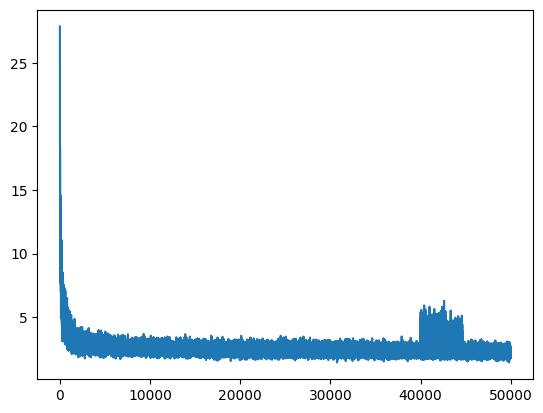

In [119]:
plt.plot(stepi, lossi)

In [122]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2133, grad_fn=<NllLossBackward0>)

In [124]:
# sample from the model
g = torch.Generator()
g.manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))


mora.
amyanna.
elend.
ryah.
reishalejdrie.
cadelyn.
elin.
shy.
jenleigh.
eson.
artelle.
malara.
noshubergiaganell.
jaireth.
konna.
alfoummereder.
yarleyels.
kayshuskeyah.
hal.
aalyansun.
